## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [13]:
df = pd.read_csv("loan_data1.csv")
print(df.head())
print(df.info())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

## Feature Transformation (Categorical → Numerical)

In [14]:
# Convert purpose column using one-hot encoding
df = pd.get_dummies(df, columns=["purpose"], drop_first=True)

## Exploratory Data Analysis (EDA)

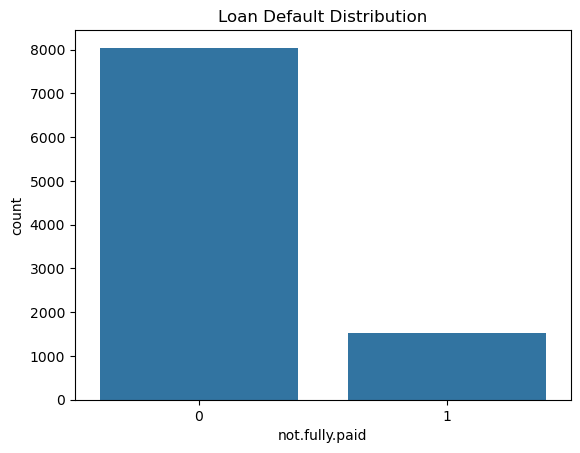

In [15]:
sns.countplot(x="not.fully.paid", data=df)
plt.title("Loan Default Distribution")
plt.show()

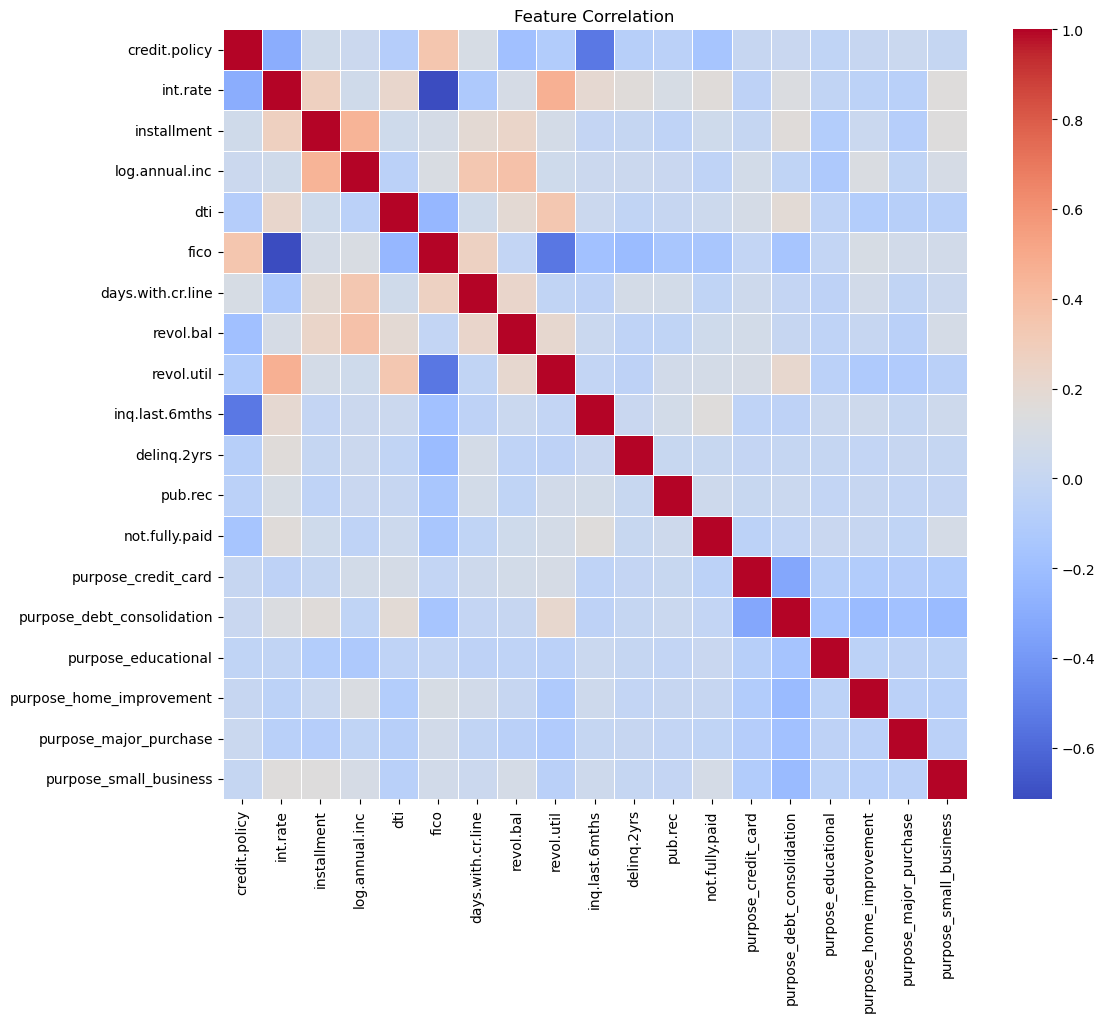

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

## Feature Engineering (Drop Highly Correlated Features)

In [17]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropped columns:", to_drop)

df.drop(columns=to_drop, inplace=True)

Dropped columns: []


## Split Features and Target

In [18]:
X = df.drop("not.fully.paid", axis=1)
y = df["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Deep Learning Model

In [20]:
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

C:\Users\vikra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [22]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8378 - loss: 0.4203 - val_accuracy: 0.8474 - val_loss: 0.3999
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8390 - loss: 0.4206 - val_accuracy: 0.8474 - val_loss: 0.3997
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8390 - loss: 0.4171 - val_accuracy: 0.8480 - val_loss: 0.4012
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8373 - loss: 0.4186 - val_accuracy: 0.8467 - val_loss: 0.3997
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8383 - loss: 0.4115 - val_accuracy: 0.8467 - val_loss: 0.3991
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8381 - loss: 0.4123 - val_accuracy: 0.8474 - val_loss: 0.4000
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8390 - loss: 0.4100 - val_accuracy: 0.8474 - val_loss: 0.4011
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8386 - loss: 0.4102 - val_accuracy: 0.

## Evaluate Model

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4083 
Test Accuracy: 0.8387265205383301


##  Predictions and Metrics

In [24]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

Confusion Matrix:
[[1607    2]
 [ 307    0]]
ROC AUC Score: 0.49937849596022377


## Training History Plot

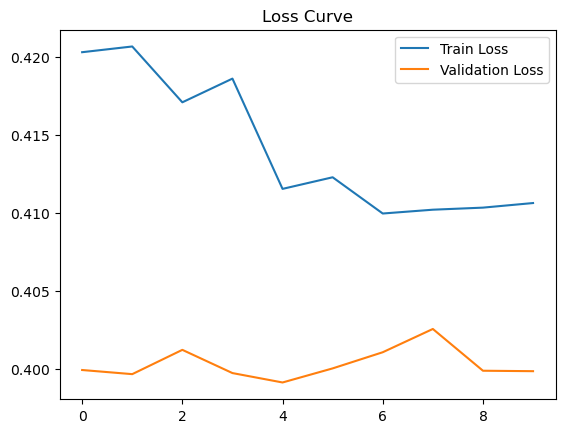

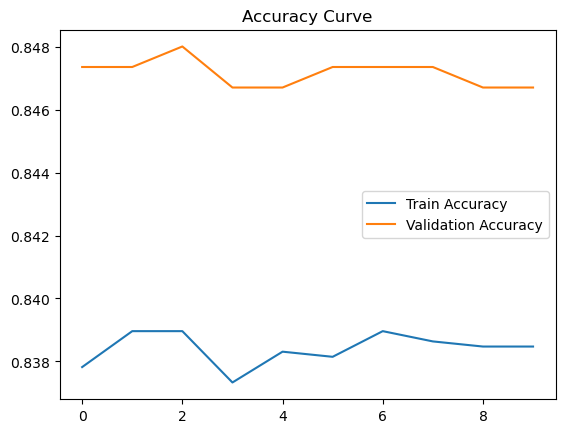

In [25]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()